In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

passengerID is unique for everyone.
there are only 3 Pclass.
Name is unique of everone
there are only two sex M/F.
There are only 88 unique ages.


In [6]:
duplicate_rows=df[df.duplicated(['PassengerId','Survived','Pclass','Name','Sex','Age','Embarked'])]

In [7]:
duplicate_rows

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

there is no duplicate row

In [8]:
df.duplicated(['PassengerId']).any()

False

In [9]:
df.duplicated(['Survived']).any()

True

In [10]:
df.duplicated(['Pclass']).any()

True

In [11]:
df.duplicated(['Name']).any()

False

In [12]:
df.duplicated(['Sex']).any()

True

In [13]:
df.duplicated(['Age']).any()

True

In [14]:
df.duplicated(['SibSp']).any()

True

In [15]:
df.duplicated(['Parch']).any()

True

In [16]:
df.duplicated(['Ticket']).any()

True

In [17]:
df.duplicated(['Fare']).any()

True

In [18]:
df.duplicated(['Cabin']).any()

True

In [19]:
df.duplicated(['Embarked']).any()

True

In [20]:
df.isna()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

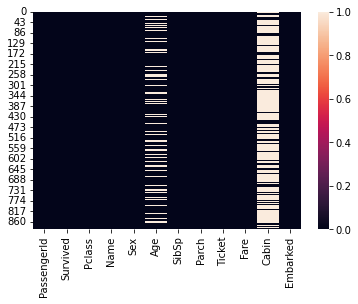

In [22]:
sns.heatmap(df.isna())

Handling missing value

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer= SimpleImputer(missing_values=np.nan,strategy='median')

In [25]:
df['Age']=imputer.fit_transform(df['Age'].values.reshape(-1,1))

In [26]:
imputer= SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [27]:
df['Cabin']=imputer.fit_transform(df['Cabin'].values.reshape(-1,1))

In [28]:
df['Embarked']=imputer.fit_transform(df['Embarked'].values.reshape(-1,1))

In [29]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare    Cabin Embarked  
0        0         A/5 21171   7.2500  B96 B98        S  
1        0          PC 17599  71.2833      C85        C  
2        0  STON/O2. 3101282   7.9250  B96 B98        S  
3        0            113803  53.1000     C123        S  
4        0            373450   8.0500  B96 B98        S  
..     ...               ...      ...      ...      ...  
886      0            211536  13.0000  B96 B98        S  
887      0            112053  30.0000      B42        S  
888      2        W./C. 6607  23.4500  B96 B98        S  
889      0            111369  30.0000     C148        C  
890      0            370376   7.7500  B96 B98        Q  

[891 rows x 12 columns]

In [30]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

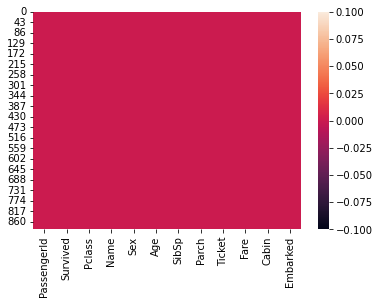

In [31]:
sns.heatmap(df.isna())

as we can see now there is no missing value in our data

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PassengerId', ylabel='count'>

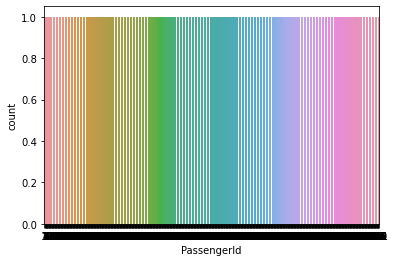

In [32]:
sns.countplot(df['PassengerId'])

everyone has a unique Id

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

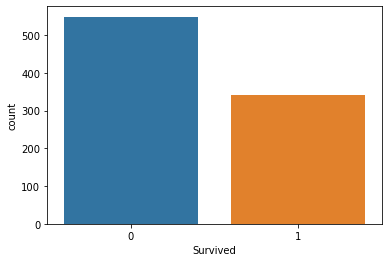

In [33]:
sns.countplot(df['Survived'])

nonsurvived people are more in comparision to survived people

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

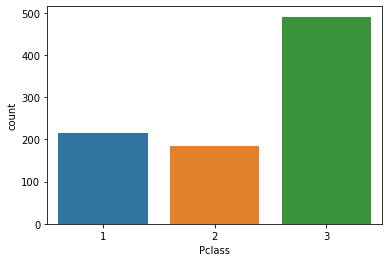

In [34]:
sns.countplot(df['Pclass'])

most of the people have 3rd class seats

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

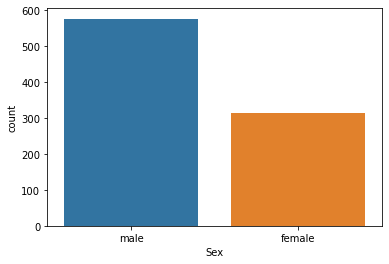

In [35]:
sns.countplot(df['Sex'])

there are more male people than female in titanic

<AxesSubplot:xlabel='Age', ylabel='Count'>

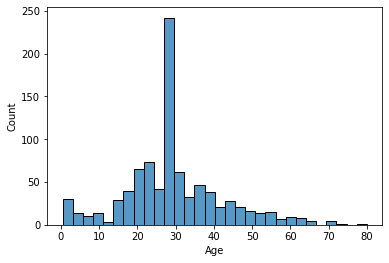

In [36]:
sns.histplot(df['Age'])

most of the people were of 30 years on titanic

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

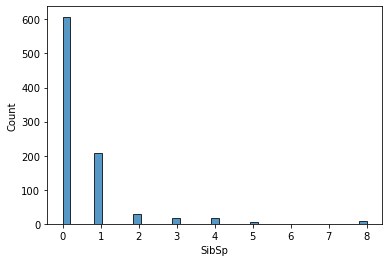

In [37]:
sns.histplot(df['SibSp'])

highest of sibsp is 0 in quantity.

<AxesSubplot:xlabel='Parch', ylabel='Count'>

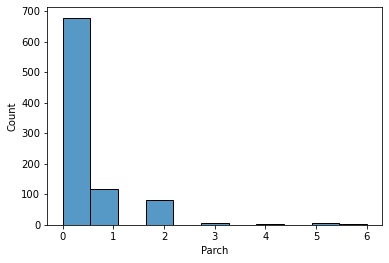

In [38]:
sns.histplot(df['Parch'])

0 has highest parch in count.

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x1080 with 0 Axes>

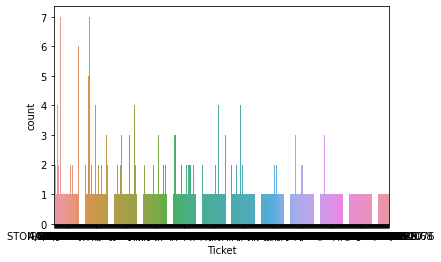

<Figure size 720x1080 with 0 Axes>

In [39]:
sns.countplot(df['Ticket'])
plt.figure(figsize=(10,15))

<AxesSubplot:xlabel='Fare', ylabel='Count'>

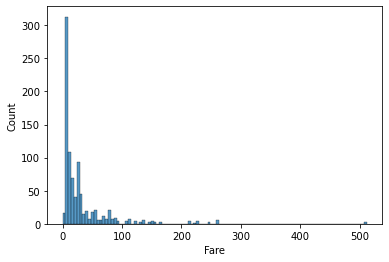

In [40]:
sns.histplot(df['Fare'])

more ticket of lesser than 100 rs were sold.

<Figure size 36000x7200 with 0 Axes>

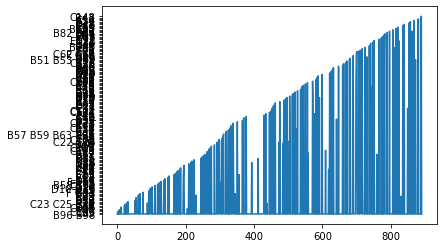

<Figure size 36000x7200 with 0 Axes>

In [41]:
plt.plot(df['Cabin'])
plt.figure(figsize=(500,100))

C:\Users\91789\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

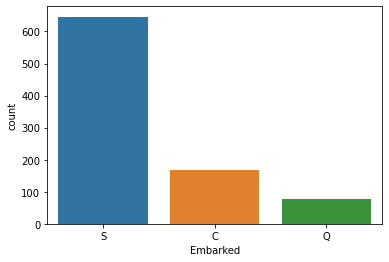

In [42]:
sns.countplot(df['Embarked'])

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

In [45]:
df['Sex']=le.fit_transform(df['Sex'])

In [46]:
df['Ticket']=le.fit_transform(df['Ticket'])

In [47]:
df['Fare']= le.fit_transform(df['Fare'])

In [48]:
df['Cabin']=le.fit_transform(df['Cabin'])

In [49]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [50]:
df['Name']=le.fit_transform(df['Name'])

In [51]:
df

PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0              1         0       3   108    1  22.0      1      0     523   
1              2         1       1   190    0  38.0      1      0     596   
2              3         1       3   353    0  26.0      0      0     669   
3              4         1       1   272    0  35.0      1      0      49   
4              5         0       3    15    1  35.0      0      0     472   
..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
886          887         0       2   548    1  27.0      0      0     101   
887          888         1       1   303    0  19.0      0      0      14   
888          889         0       3   413    0  28.0      1      2     675   
889          890         1       1    81    1  26.0      0      0       8   
890          891         0       3   220    1  32.0      0      0     466   

     Fare  Cabin  Embarked  
0      18     47         2  
1     207     81         0  
2      41     47         2  
3     189     55         2  
4      43     47         2  
..    ...    ...       ...  
886    85     47         2  
887   153     30         2  
888   131     47         2  
889   153     60         0  
890    30     47         1  

[891 rows x 12 columns]

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

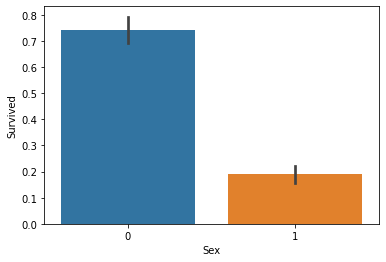

In [52]:
sns.barplot(x='Sex',y='Survived',data=df)

survival rate of Female is more than male

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

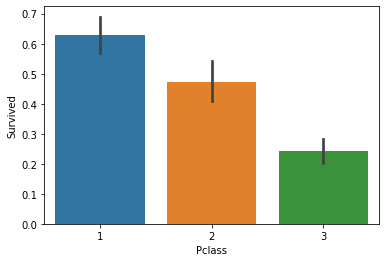

In [53]:
sns.barplot(x='Pclass',y='Survived',data=df)

survival rate of 0 class is more than 1st and 2nd

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

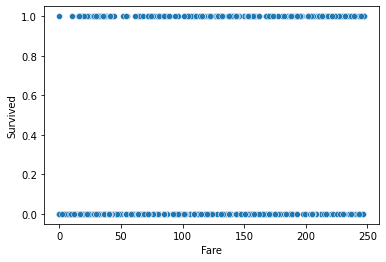

In [54]:
sns.scatterplot(x='Fare',y='Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Ticket'>

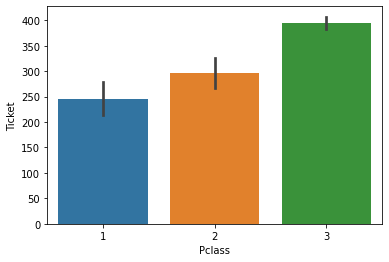

In [55]:
sns.barplot(x='Pclass',y='Ticket',data=df)

ticket price of 2nd class is highest.

<AxesSubplot:xlabel='Ticket', ylabel='Survived'>

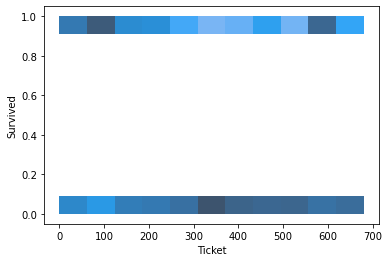

In [56]:
sns.histplot(x='Ticket',y='Survived',data=df)

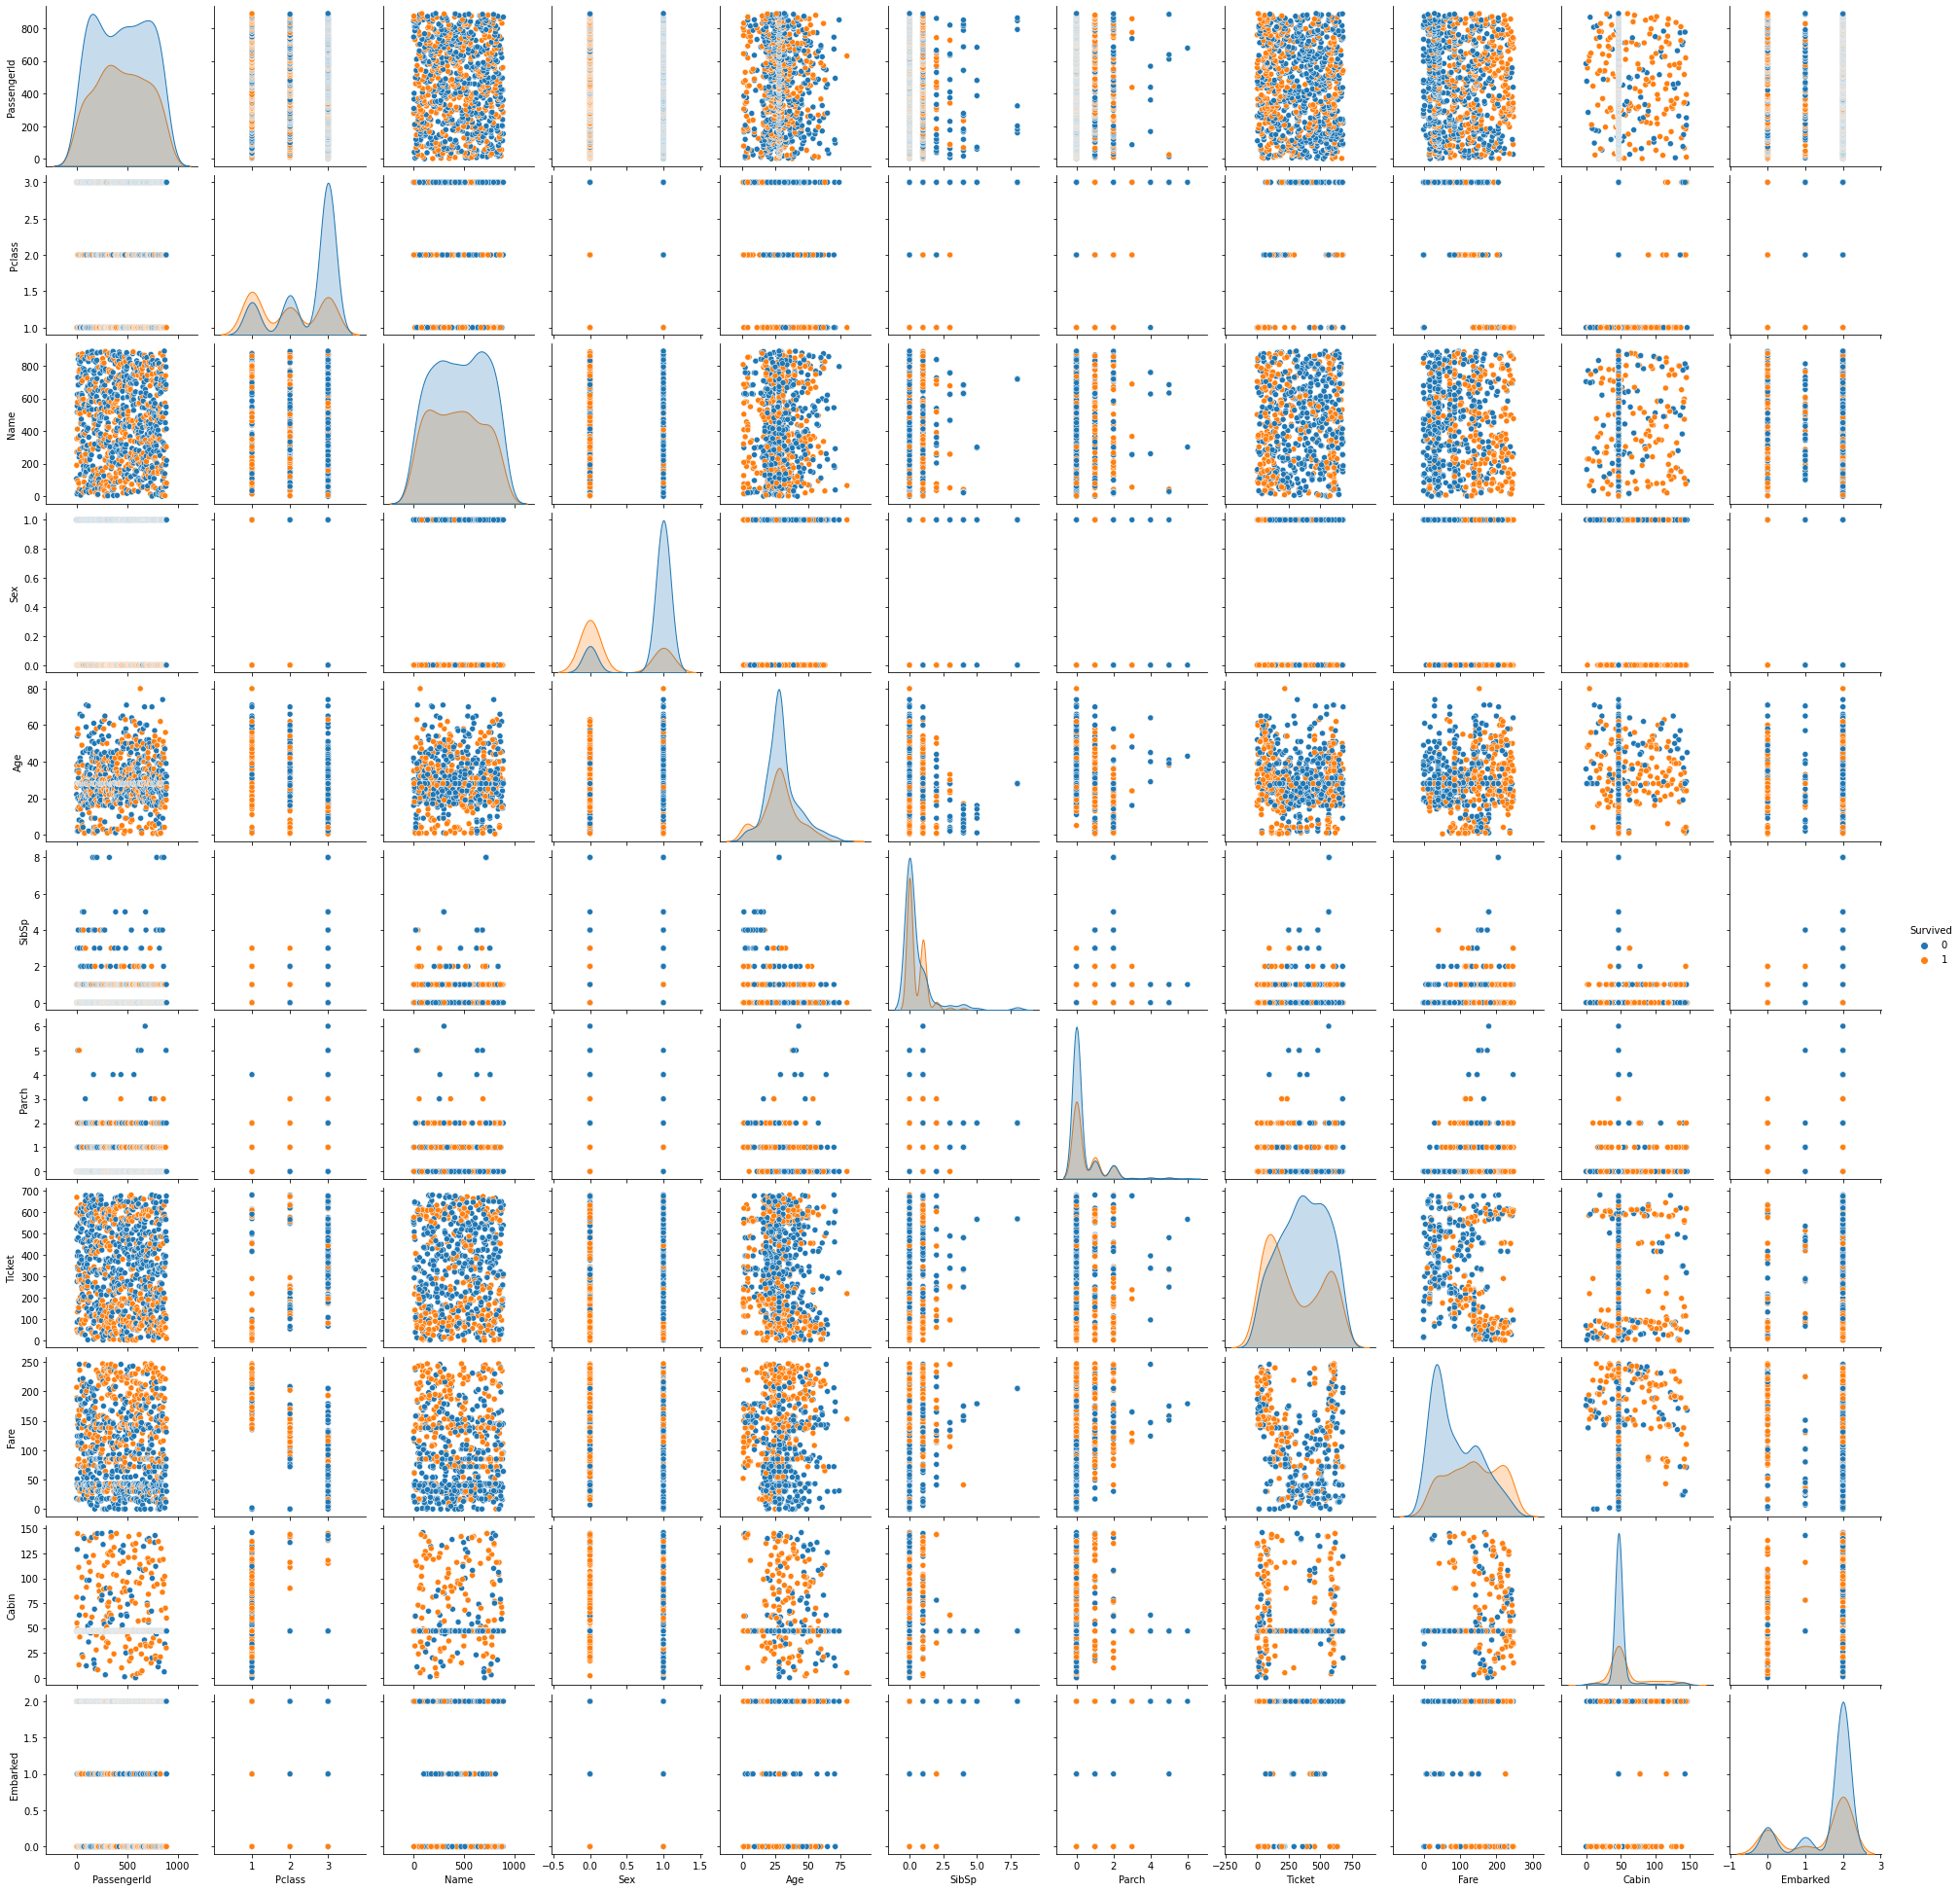

In [57]:
sns.pairplot(df,hue='Survived')

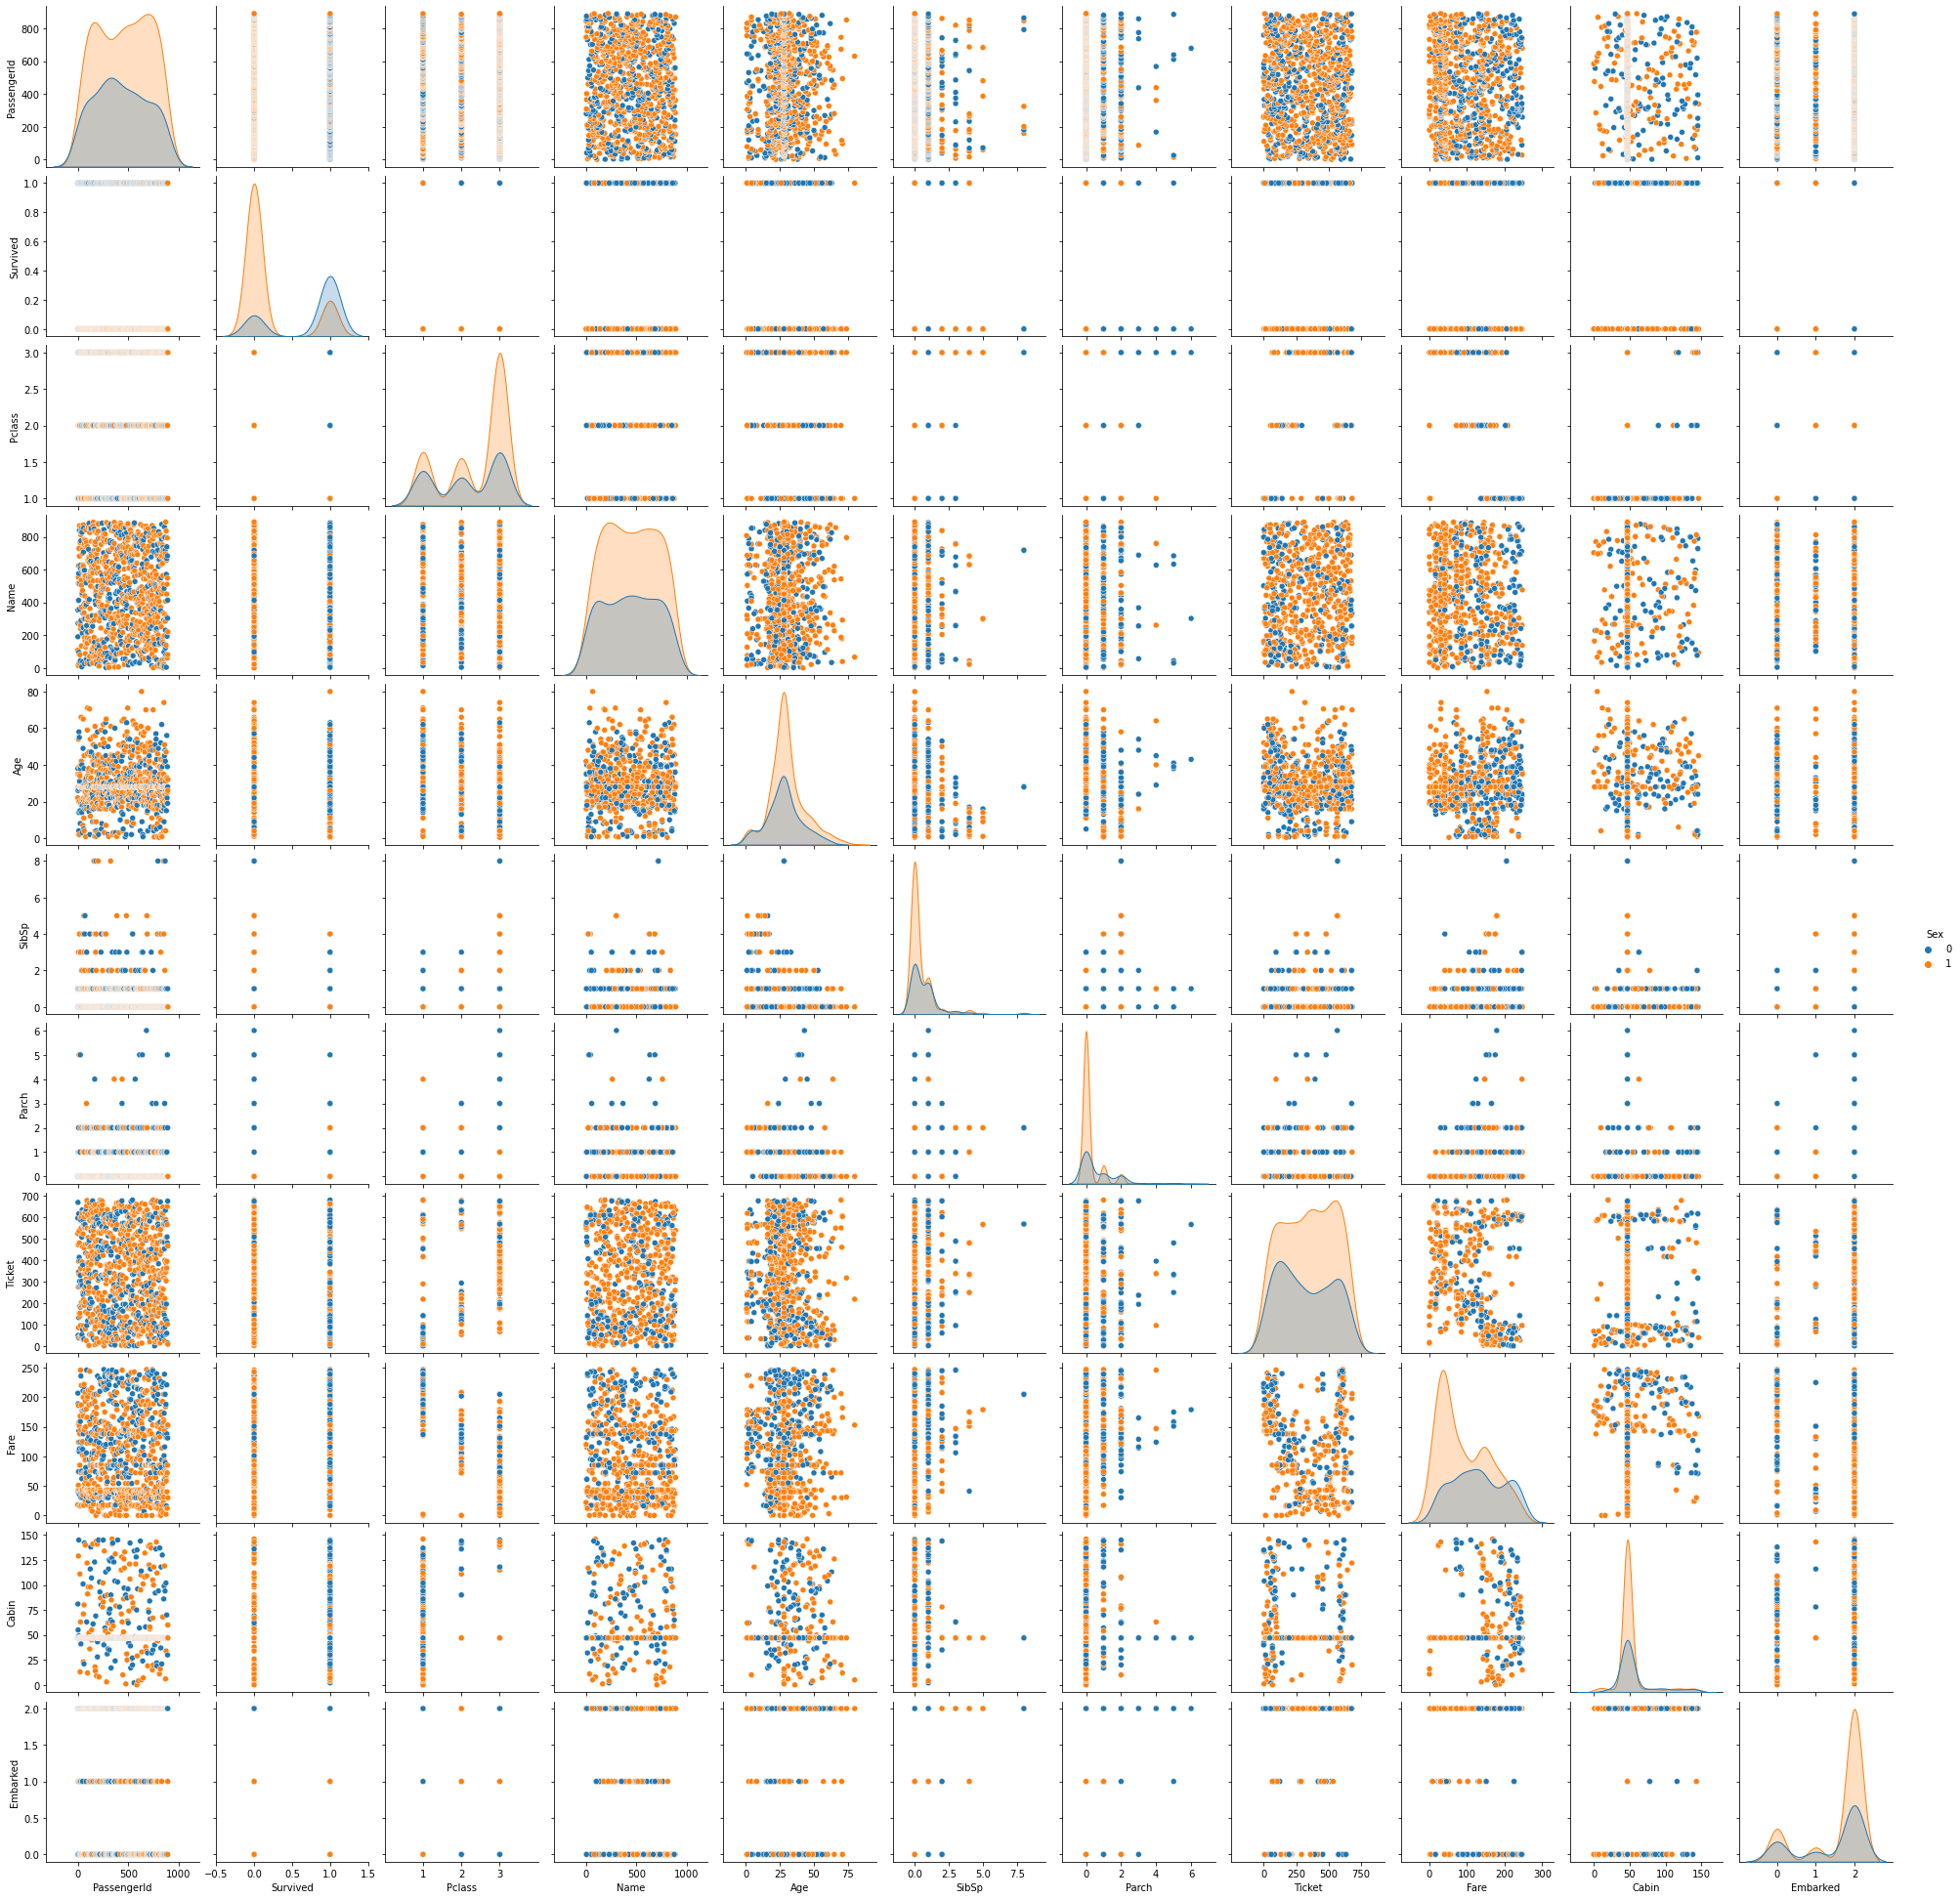

In [58]:
sns.pairplot(df,hue='Sex')

checking multicollinearity

In [59]:
df.corr()

PassengerId  Survived    Pclass      Name       Sex       Age  \
PassengerId     1.000000 -0.005007 -0.035144 -0.038559  0.042939  0.034212   
Survived       -0.005007  1.000000 -0.338481 -0.057343 -0.543351 -0.064910   
Pclass         -0.035144 -0.338481  1.000000  0.052831  0.131900 -0.339898   
Name           -0.038559 -0.057343  0.052831  1.000000  0.020314  0.048252   
Sex             0.042939 -0.543351  0.131900  0.020314  1.000000  0.081163   
Age             0.034212 -0.064910 -0.339898  0.048252  0.081163  1.000000   
SibSp          -0.057527 -0.035322  0.083081 -0.017230 -0.114631 -0.233296   
Parch          -0.001652  0.081629  0.018443 -0.049105 -0.245489 -0.172482   
Ticket         -0.056554 -0.164549  0.319869  0.047348  0.059372 -0.070382   
Fare           -0.006390  0.333943 -0.724119 -0.053846 -0.265389  0.118938   
Cabin          -0.018086  0.175690 -0.248495  0.034129 -0.102643  0.060534   
Embarked        0.013128 -0.167675  0.162098 -0.006117  0.108262 -0.018754   

                SibSp     Parch    Ticket      Fare     Cabin  Embarked  
PassengerId -0.057527 -0.001652 -0.056554 -0.006390 -0.018086  0.013128  
Survived    -0.035322  0.081629 -0.164549  0.333943  0.175690 -0.167675  
Pclass       0.083081  0.018443  0.319869 -0.724119 -0.248495  0.162098  
Name        -0.017230 -0.049105  0.047348 -0.053846  0.034129 -0.006117  
Sex         -0.114631 -0.245489  0.059372 -0.265389 -0.102643  0.108262  
Age         -0.233296 -0.172482 -0.070382  0.118938  0.060534 -0.018754  
SibSp        1.000000  0.414838  0.079461  0.356623 -0.005539  0.068230  
Parch        0.414838  1.000000  0.020003  0.361243  0.022682  0.039798  
Ticket       0.079461  0.020003  1.000000 -0.168153 -0.072200 -0.001729  
Fare         0.356623  0.361243 -0.168153  1.000000  0.202530 -0.158036  
Cabin       -0.005539  0.022682 -0.072200  0.202530  1.000000  0.023804  
Embarked     0.068230  0.039798 -0.001729 -0.158036  0.023804  1.000000

<Figure size 7200x7200 with 0 Axes>

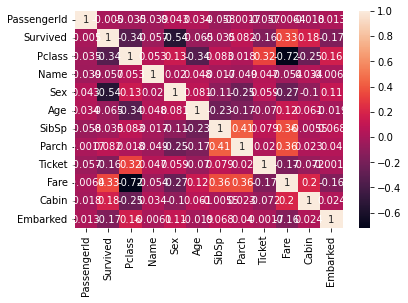

<Figure size 7200x7200 with 0 Axes>

In [60]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(100,100))

In [61]:
df.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Embarked      -0.167675
Ticket        -0.164549
Age           -0.064910
Name          -0.057343
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Cabin          0.175690
Fare           0.333943
Survived       1.000000
Name: Survived, dtype: float64

In [62]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['features']= df.columns
    vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    
    return(vif)

In [64]:
x=df
calc_vif(x)

features        VIF
0   PassengerId   3.893883
1      Survived   2.492882
2        Pclass  11.001690
3          Name   3.978477
4           Sex   3.950536
5           Age   6.403914
6         SibSp   1.939967
7         Parch   1.775069
8        Ticket   4.391397
9          Fare   7.105875
10        Cabin   6.245858
11     Embarked   4.907968

Fare has highest multicollinearity

In [65]:
x1=df.drop(['Pclass'],axis=1)

In [66]:
calc_vif(x1)

features        VIF
0   PassengerId   3.893883
1      Survived   2.492882
2        Pclass  11.001690
3          Name   3.978477
4           Sex   3.950536
5           Age   6.403914
6         SibSp   1.939967
7         Parch   1.775069
8        Ticket   4.391397
9          Fare   7.105875
10        Cabin   6.245858
11     Embarked   4.907968

In [67]:
df1=df.drop(['Pclass'],axis=1)

In [68]:
df1

PassengerId  Survived  Name  Sex   Age  SibSp  Parch  Ticket  Fare  \
0              1         0   108    1  22.0      1      0     523    18   
1              2         1   190    0  38.0      1      0     596   207   
2              3         1   353    0  26.0      0      0     669    41   
3              4         1   272    0  35.0      1      0      49   189   
4              5         0    15    1  35.0      0      0     472    43   
..           ...       ...   ...  ...   ...    ...    ...     ...   ...   
886          887         0   548    1  27.0      0      0     101    85   
887          888         1   303    0  19.0      0      0      14   153   
888          889         0   413    0  28.0      1      2     675   131   
889          890         1    81    1  26.0      0      0       8   153   
890          891         0   220    1  32.0      0      0     466    30   

     Cabin  Embarked  
0       47         2  
1       81         0  
2       47         2  
3       55         2  
4       47         2  
..     ...       ...  
886     47         2  
887     30         2  
888     47         2  
889     60         0  
890     47         1  

[891 rows x 11 columns]

In [69]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['features']= df1.columns
    vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    
    return(vif)

In [70]:
x=df1
calc_vif(x)

features       VIF
0   PassengerId  3.656862
1      Survived  2.368753
2          Name  3.688446
3           Sex  3.636175
4           Age  6.254495
5         SibSp  1.788231
6         Parch  1.676517
7        Ticket  3.448367
8          Fare  5.306637
9         Cabin  6.022621
10     Embarked  4.432574

checking skewness

In [71]:
df1.skew()

PassengerId    0.000000
Survived       0.478523
Name           0.000000
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           0.366943
Cabin          2.268926
Embarked      -1.264823
dtype: float64

there is some skewness in SibSp, Parch, Cabin

In [72]:
from scipy import stats


In [73]:
df1['SibSp']=np.sqrt(df1['SibSp'])

In [74]:
df1['Parch']=np.sqrt(df1['Parch'])

In [75]:
df1['Cabin']=np.sqrt(df1['Cabin'])

In [76]:
df1

PassengerId  Survived  Name  Sex   Age  SibSp     Parch  Ticket  Fare  \
0              1         0   108    1  22.0    1.0  0.000000     523    18   
1              2         1   190    0  38.0    1.0  0.000000     596   207   
2              3         1   353    0  26.0    0.0  0.000000     669    41   
3              4         1   272    0  35.0    1.0  0.000000      49   189   
4              5         0    15    1  35.0    0.0  0.000000     472    43   
..           ...       ...   ...  ...   ...    ...       ...     ...   ...   
886          887         0   548    1  27.0    0.0  0.000000     101    85   
887          888         1   303    0  19.0    0.0  0.000000      14   153   
888          889         0   413    0  28.0    1.0  1.414214     675   131   
889          890         1    81    1  26.0    0.0  0.000000       8   153   
890          891         0   220    1  32.0    0.0  0.000000     466    30   

        Cabin  Embarked  
0    6.855655         2  
1    9.000000         0  
2    6.855655         2  
3    7.416198         2  
4    6.855655         2  
..        ...       ...  
886  6.855655         2  
887  5.477226         2  
888  6.855655         2  
889  7.745967         0  
890  6.855655         1  

[891 rows x 11 columns]

In [77]:
df1.skew()

PassengerId    0.000000
Survived       0.478523
Name           0.000000
Sex           -0.618921
Age            0.510245
SibSp          1.436526
Parch          1.529799
Ticket         0.000246
Fare           0.366943
Cabin          1.004866
Embarked      -1.264823
dtype: float64

as we can see now there is no skewness in our data now.

checking outliers

In [78]:
colist=df1.columns
ncol=30
nrow=15

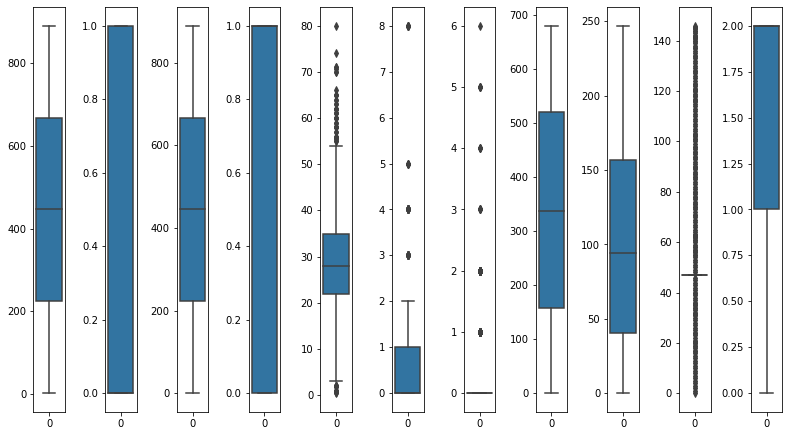

In [79]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(colist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df[colist[i]],orient='v')
    plt.tight_layout()

there are outliers in Age, Parch, SibSp, Cabin

In [80]:
import scipy.stats as stats

In [81]:
from scipy.stats import zscore

In [82]:
stats.zscore(df1)

PassengerId  Survived      Name       Sex       Age     SibSp     Parch  \
0      -1.730108 -0.789272 -1.310217  0.737695 -0.565736  1.004410 -0.539747   
1      -1.726220  1.266990 -0.991410 -1.355574  0.663861  1.004410 -0.539747   
2      -1.722332  1.266990 -0.357685 -1.355574 -0.258337 -0.629537 -0.539747   
3      -1.718444  1.266990 -0.672604 -1.355574  0.433312  1.004410 -0.539747   
4      -1.714556 -0.789272 -1.671790  0.737695  0.433312 -0.629537 -0.539747   
..           ...       ...       ...       ...       ...       ...       ...   
886     1.714556 -0.789272  0.400452  0.737695 -0.181487 -0.629537 -0.539747   
887     1.718444  1.266990 -0.552079 -1.355574 -0.796286 -0.629537 -0.539747   
888     1.722332 -0.789272 -0.124412 -1.355574 -0.104637  1.004410  2.061805   
889     1.726220  1.266990 -1.415189  0.737695 -0.258337 -0.629537 -0.539747   
890     1.730108 -0.789272 -0.874774  0.737695  0.202762 -0.629537 -0.539747   

       Ticket      Fare     Cabin  Embarked  
0    0.918966 -1.247170 -0.221922  0.585954  
1    1.282625  1.451165  1.253334 -1.942303  
2    1.646283 -0.918801 -0.221922  0.585954  
3   -1.442322  1.194181  0.163718  0.585954  
4    0.664904 -0.890248 -0.221922  0.585954  
..        ...       ...       ...       ...  
886 -1.183277 -0.290618 -0.221922  0.585954  
887 -1.616678  0.680212 -1.170246  0.585954  
888  1.676173  0.366120 -0.221922  0.585954  
889 -1.646568  0.680212  0.390590 -1.942303  
890  0.635014 -1.075847 -0.221922 -0.678175  

[891 rows x 11 columns]

In [83]:
z=np.abs(zscore(df1))
z.shape

(891, 11)

In [84]:
np.where(z>3)

(array([ 10,  13,  25,  59,  66,  71,  75,  96, 116, 128, 148, 159, 167,
        180, 183, 193, 201, 205, 251, 262, 284, 324, 339, 340, 345, 360,
        386, 394, 438, 475, 480, 493, 516, 556, 558, 567, 583, 585, 599,
        610, 618, 630, 630, 638, 647, 672, 678, 683, 699, 715, 724, 745,
        772, 776, 792, 809, 846, 851, 863, 867, 885], dtype=int64),
 array([9, 6, 6, 5, 9, 5, 9, 4, 4, 9, 9, 5, 6, 5, 9, 9, 5, 9, 9, 9, 9, 5,
        9, 9, 9, 6, 5, 9, 6, 9, 5, 4, 9, 9, 9, 6, 9, 9, 9, 6, 9, 4, 9, 6,
        9, 4, 6, 5, 9, 9, 9, 4, 9, 9, 5, 9, 5, 4, 5, 9, 6], dtype=int64))

In [85]:
df_new=df1[(z<3).all(axis=1)]

In [86]:
df_new

PassengerId  Survived  Name  Sex   Age  SibSp     Parch  Ticket  Fare  \
0              1         0   108    1  22.0    1.0  0.000000     523    18   
1              2         1   190    0  38.0    1.0  0.000000     596   207   
2              3         1   353    0  26.0    0.0  0.000000     669    41   
3              4         1   272    0  35.0    1.0  0.000000      49   189   
4              5         0    15    1  35.0    0.0  0.000000     472    43   
..           ...       ...   ...  ...   ...    ...       ...     ...   ...   
886          887         0   548    1  27.0    0.0  0.000000     101    85   
887          888         1   303    0  19.0    0.0  0.000000      14   153   
888          889         0   413    0  28.0    1.0  1.414214     675   131   
889          890         1    81    1  26.0    0.0  0.000000       8   153   
890          891         0   220    1  32.0    0.0  0.000000     466    30   

        Cabin  Embarked  
0    6.855655         2  
1    9.000000         0  
2    6.855655         2  
3    7.416198         2  
4    6.855655         2  
..        ...       ...  
886  6.855655         2  
887  5.477226         2  
888  6.855655         2  
889  7.745967         0  
890  6.855655         1  

[831 rows x 11 columns]

In [87]:
print("old data",df.shape)
print("New data",df_new.shape)

old data (891, 12)
New data (831, 11)


In [88]:
data_loss=(891*12-831*11)/(891*12)

In [89]:
data_loss

0.14506172839506173

In [90]:
x=df_new.drop(['Survived'],axis=1)

In [91]:
x

PassengerId  Name  Sex   Age  SibSp     Parch  Ticket  Fare     Cabin  \
0              1   108    1  22.0    1.0  0.000000     523    18  6.855655   
1              2   190    0  38.0    1.0  0.000000     596   207  9.000000   
2              3   353    0  26.0    0.0  0.000000     669    41  6.855655   
3              4   272    0  35.0    1.0  0.000000      49   189  7.416198   
4              5    15    1  35.0    0.0  0.000000     472    43  6.855655   
..           ...   ...  ...   ...    ...       ...     ...   ...       ...   
886          887   548    1  27.0    0.0  0.000000     101    85  6.855655   
887          888   303    0  19.0    0.0  0.000000      14   153  5.477226   
888          889   413    0  28.0    1.0  1.414214     675   131  6.855655   
889          890    81    1  26.0    0.0  0.000000       8   153  7.745967   
890          891   220    1  32.0    0.0  0.000000     466    30  6.855655   

     Embarked  
0           2  
1           0  
2           2  
3           2  
4           2  
..        ...  
886         2  
887         2  
888         2  
889         0  
890         1  

[831 rows x 10 columns]

In [92]:
y=df_new['Survived']

In [93]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 831, dtype: int64

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [95]:
lr=LogisticRegression()

In [96]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(i)

C:\Users\91789\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91789\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

562


C:\Users\91789\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91789\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=0.2)

In [98]:
x_train.shape

(664, 10)

In [99]:
x_test.shape

(167, 10)

In [100]:
y_train.shape

(664,)

In [101]:
y_test.shape

(167,)

In [102]:
pred_train=lr.predict(x_train)

In [103]:
pred_train.shape

(664,)

In [104]:
pred_test=lr.predict(x_test)

In [105]:
pred_test.shape

(167,)

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [107]:
accuracy=accuracy_score(y_test,pred_test)

In [108]:
accuracy

0.8203592814371258

In [109]:
confusion_matrix(y_test,pred_test)

array([[89, 13],
       [17, 48]], dtype=int64)

In [110]:
from sklearn.metrics import precision_score,recall_score

In [111]:
precision_score(y_test,pred_test)

0.7868852459016393

In [112]:
recall_score(y_test,pred_test)

0.7384615384615385

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
model=RandomForestClassifier(n_estimators=200,random_state=1)

In [115]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

In [116]:
x_train.shape

(664, 10)

In [117]:
y_train.shape

(664,)

In [118]:
x_test_pred=model.predict(x_test)

In [119]:
x_train_pred=model.predict(x_train)

In [120]:
accuracy=accuracy_score(y_train,x_train_pred)

In [121]:
accuracy

1.0

In [122]:
confusion_matrix(y_train,x_train_pred)

array([[406,   0],
       [  0, 258]], dtype=int64)

In [123]:
precision_score(y_train,x_train_pred)

1.0

In [124]:
recall_score(y_train,x_train_pred)

1.0

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
model1=KNeighborsClassifier(n_neighbors=3)

In [127]:
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [128]:
x_test_pred=model1.predict(x_test)

In [129]:
x_train_pred=model1.predict(x_train)

In [130]:
accuracy=accuracy_score(y_train,x_train_pred)

In [131]:
accuracy

0.7816265060240963

In [132]:
confusion_matrix(y_train,x_train_pred)

array([[336,  70],
       [ 75, 183]], dtype=int64)

In [133]:
precision_score(y_train,x_train_pred)

0.7233201581027668

In [134]:
recall_score(y_train,x_train_pred)

0.7093023255813954

In [135]:
from sklearn.svm import SVC

In [136]:
model_2=SVC()

In [137]:
model_2.fit(x_train,y_train)

SVC()

In [138]:
x_test_pred=model_2.predict(x_test)

In [139]:
x_train_pred=model_2.predict(x_train)

In [140]:
accuracy=accuracy_score(y_train,x_train_pred)

In [141]:
accuracy

0.6957831325301205

In [142]:
confusion_matrix(y_train,x_train_pred)

array([[373,  33],
       [169,  89]], dtype=int64)

In [143]:
precision_score(y_train,x_train_pred)

0.7295081967213115

In [144]:
recall_score(y_train,x_train_pred)

0.3449612403100775

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
model_3=DecisionTreeClassifier(random_state=6)

In [147]:
model_3.fit(x_train,y_train)

DecisionTreeClassifier(random_state=6)

In [148]:
x_test_pred=model_3.predict(x_test)

In [149]:
x_train_pred=model_3.predict(x_train)

In [150]:
accuracy=accuracy_score(y_train,x_train_pred)

In [151]:
accuracy

1.0

In [152]:
confusion_matrix(y_train,x_train_pred)

array([[406,   0],
       [  0, 258]], dtype=int64)

In [153]:
precision_score(y_train,x_train_pred)

1.0

In [154]:
recall_score(y_train,x_train_pred)

1.0

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
dict1={'Kernel':['rbf','poly','linear']}

In [157]:
model=DecisionTreeClassifier()

In [158]:
gd=GridSearchCV(estimator=model,param_grid=dict1 ,cv=5)

In [159]:

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [160]:
x_train_pred=model.predict(x_train)

In [161]:
x_test_pred=model.predict(x_test)

In [162]:
accuracy=accuracy_score(y_train,x_train_pred)

In [163]:
accuracy

1.0

In [164]:
from sklearn.model_selection import cross_validate

In [165]:
from sklearn import linear_model
lasso= linear_model.Lasso()
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [167]:
from sklearn.model_selection import KFold,StratifiedKFold

In [168]:
skf=StratifiedKFold(5,shuffle=True,random_state=1)

In [170]:
 clf=RandomForestClassifier()

In [171]:
cross_val_score(clf,x,y,cv=skf,scoring='accuracy')

array([0.85628743, 0.8313253 , 0.78313253, 0.81927711, 0.84337349])

In [172]:
 clf=SVC()

In [173]:
cross_val_score(clf,x,y,cv=skf,scoring='accuracy')

array([0.64071856, 0.68674699, 0.6686747 , 0.63855422, 0.71084337])

In [176]:
clf=KNeighborsClassifier()

In [177]:
cross_val_score(clf,x,y,cv=skf,scoring='accuracy')

array([0.69461078, 0.68674699, 0.63253012, 0.61445783, 0.68072289])

In [178]:
clf=DecisionTreeClassifier()

In [179]:
cross_val_score(clf,x,y,cv=skf,scoring='accuracy')

array([0.78443114, 0.76506024, 0.72891566, 0.8253012 , 0.80120482])

Best accuracy is with RandomForestClassifier

In [180]:
import pickle

In [181]:
saved_model=pickle.dumps(model)

In [182]:
knn_from_pickle=pickle.loads(saved_model)

In [183]:
knn_from_pickle.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [184]:
x_test.shape

(167, 10)